**Table of contents**<a id='toc0_'></a>    
- [Network X Playground](#toc1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Network X Playground](#toc0_)

edges_df

In [1]:
import networkx as nx
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go

In [2]:
def combine_columns(df, columns_to_combine, columns_to_keep, new_name, columns_to_drop):
    """Combine multiple columns into one while keeping associated data attached.
    Use this function when the columns to combine are easier to list 
    than the columns not to combine.
    
    :param df: The DataFrame containing the columns to be combined
    :param columns_to_combine: List of column names to combine into one
    :param columns_to_keep: List of columns to keep in the final DataFrame
    :param new_name: The name of the new combined column
    :param columns_to_drop: List of columns to drop from the final DataFrame
    :return: A new DataFrame with combined columns and selected columns retained
    """
    og_df = df.copy()

    combined_dfs = []

    # Loop through each column in columns_to_combine and create a new DataFrame
    for col in columns_to_combine:
        temp_df = og_df[list(set([col] + columns_to_keep))].copy()
        temp_df[new_name] = temp_df[col]
        combined_dfs.append(temp_df)

    df_combined = pd.concat(combined_dfs, ignore_index=True)
    df_combined.drop(columns_to_drop, axis=1, inplace=True)
    df_combined.drop_duplicates(inplace=True)
    
    return df_combined

In [3]:
edges_df = pd.read_csv("../output/edges_df.csv", index_col=[0])
edges_df

,symbol,primary_gene_symbol,concept_id,relationship,source
0,MT-TF,MT-TF,HGNC:7481,NaN,NaN
1,MT-RNR1,MT-RNR1,HGNC:7470,NaN,NaN
2,MT-TV,MT-TV,HGNC:7500,NaN,NaN
3,MT-RNR2,MT-RNR2,HGNC:7471,NaN,NaN
4,MT-TL1,MT-TL1,HGNC:7490,NaN,NaN
...,...,...,...,...,...
1640862,MOPD1,RNU4ATAC,GENE ID:100151683,Prefix Disease Symbol,OMIM
1640865,RFMN,RNU4ATAC,GENE ID:100151683,Prefix Disease Symbol,OMIM
1640867,TALS,RNU4ATAC,GENE ID:100151683,Prefix Disease Symbol,OMIM
1642742,BMND15,MIR2861,GENE ID:100422910,Prefix Disease Symbol,OMIM


In [4]:
asp_edges_df = edges_df.loc[(edges_df["symbol"] == "ASP") | (edges_df["primary_gene_symbol"].isin(["ATG5", "ASIP", "A1CF", "ASPA", "ASPM", "TMPRSS11D", "ROPN1L","C3"]))]
asp_edges_df

,symbol,primary_gene_symbol,concept_id,relationship,source
10161,ATG5,ATG5,HGNC:589,NaN,NaN
19845,ASIP,ASIP,HGNC:745,NaN,NaN
28542,A1CF,A1CF,HGNC:24086,NaN,NaN
28597,ASPA,ASPA,HGNC:756,NaN,NaN
31738,C3,C3,HGNC:1318,NaN,NaN
...,...,...,...,...,...
1168344,ARMD9,C3,GENE ID:718,Prefix Disease Symbol,OMIM
1169198,MCPH5,ASPM,GENE ID:259266,Prefix Disease Symbol,OMIM
1610360,SHEP9,ASIP,GENE ID:434,Prefix Disease Symbol,OMIM
1610729,AHUS5,C3,GENE ID:718,Prefix Disease Symbol,OMIM


In [5]:
asp_G = nx.from_pandas_edgelist(asp_edges_df, "primary_gene_symbol", "symbol")

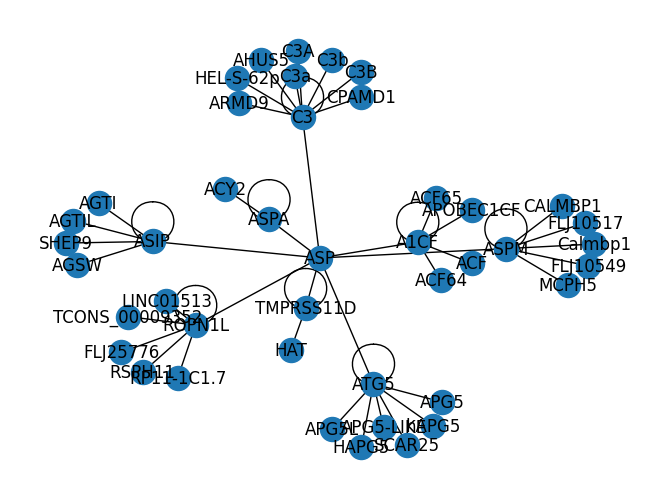

In [6]:
nx.draw_spring(asp_G, with_labels=True)
plt.show()

Combine identifier_concordance dfs

In [7]:
ensg_combined_symbols_df = pd.read_csv("../output/ensg_combined_symbols_df.csv", index_col=[0])
ensg_combined_symbols_df

,NCBI_ID,ENSG_ID,primary_gene_symbol,HGNC_ID,symbol
0,NaN,ENSG00000210049,MT-TF,HGNC:7481,MT-TF
2,NaN,ENSG00000211459,MT-RNR1,HGNC:7470,MT-RNR1
5,NaN,ENSG00000210077,MT-TV,HGNC:7500,MT-TV
7,NaN,ENSG00000210082,MT-RNR2,HGNC:7471,MT-RNR2
10,NaN,ENSG00000209082,MT-TL1,HGNC:7490,MT-TL1
...,...,...,...,...,...
234275,NaN,ENSG00000200033,RNU6-403P,HGNC:47366,NaN
234276,NaN,ENSG00000228437,LINC02474,HGNC:53417,LNCSLCC1
234277,NaN,ENSG00000228437,LINC02474,HGNC:53417,RP11-400N13.2
234278,NaN,ENSG00000229463,LYST-AS1,HGNC:41320,LYST-IT2


In [8]:
identifier_concordance_ensg_df = combine_columns(ensg_combined_symbols_df, ["HGNC_ID", "NCBI_ID"], ['primary_gene_symbol', "ENSG_ID"], "xref", ["HGNC_ID", "NCBI_ID"])
identifier_concordance_ensg_df.head()

,primary_gene_symbol,ENSG_ID,xref
0,MT-TF,ENSG00000210049,HGNC:7481
1,MT-RNR1,ENSG00000211459,HGNC:7470
2,MT-TV,ENSG00000210077,HGNC:7500
3,MT-RNR2,ENSG00000210082,HGNC:7471
4,MT-TL1,ENSG00000209082,HGNC:7490


In [9]:
identifier_concordance_ensg_df = identifier_concordance_ensg_df.rename(columns={'ENSG_ID': 'primary_ID'})

In [10]:
hgnc_combined_symbols_df = pd.read_csv("../output/hgnc_combined_symbols_df.csv", index_col=[0])
hgnc_combined_symbols_df

,NCBI_ID,ENSG_ID,primary_gene_symbol,HGNC_ID,symbol
0,GENE ID:1,ENSG00000121410,A1BG,HGNC:5,A1BG
1,GENE ID:503538,ENSG00000268895,A1BG-AS1,HGNC:37133,A1BG-AS1
2,GENE ID:29974,ENSG00000148584,A1CF,HGNC:24086,A1CF
7,GENE ID:2,ENSG00000175899,A2M,HGNC:7,A2M
10,GENE ID:144571,ENSG00000245105,A2M-AS1,HGNC:27057,A2M-AS1
...,...,...,...,...,...
135161,GENE ID:23140,ENSG00000074755,ZZEF1,HGNC:29027,KIAA0399
135162,GENE ID:23140,ENSG00000074755,ZZEF1,HGNC:29027,ZZZ4
135163,GENE ID:23140,ENSG00000074755,ZZEF1,HGNC:29027,FLJ10821
135164,GENE ID:26009,ENSG00000036549,ZZZ3,HGNC:24523,DKFZP564I052


In [11]:
identifier_concordance_hgnc_df = combine_columns(hgnc_combined_symbols_df, ["NCBI_ID", "ENSG_ID"], ['primary_gene_symbol', "HGNC_ID"], "xref", ["NCBI_ID", "ENSG_ID"])
identifier_concordance_hgnc_df.head()

,primary_gene_symbol,HGNC_ID,xref
0,A1BG,HGNC:5,GENE ID:1
1,A1BG-AS1,HGNC:37133,GENE ID:503538
2,A1CF,HGNC:24086,GENE ID:29974
3,A2M,HGNC:7,GENE ID:2
4,A2M-AS1,HGNC:27057,GENE ID:144571


In [12]:
identifier_concordance_hgnc_df

,primary_gene_symbol,HGNC_ID,xref
0,A1BG,HGNC:5,GENE ID:1
1,A1BG-AS1,HGNC:37133,GENE ID:503538
2,A1CF,HGNC:24086,GENE ID:29974
3,A2M,HGNC:7,GENE ID:2
4,A2M-AS1,HGNC:27057,GENE ID:144571
...,...,...,...
158870,ZYG11B,HGNC:25820,ENSG00000162378
158871,ZYX,HGNC:13200,ENSG00000159840
158872,ZYXP1,HGNC:51695,ENSG00000274572
158873,ZZEF1,HGNC:29027,ENSG00000074755


In [13]:
identifier_concordance_hgnc_df = identifier_concordance_hgnc_df.rename(columns={'HGNC_ID': 'primary_ID'})

In [14]:
ncbi_combined_symbols_df = pd.read_csv("../output/ncbi_combined_symbols_df.csv", index_col=[0])
ncbi_combined_symbols_df

,NCBI_ID,ENSG_ID,primary_gene_symbol,HGNC_ID,symbol
0,GENE ID:1,ENSG00000121410,A1BG,HGNC:5,A1BG
4,GENE ID:2,ENSG00000175899,A2M,HGNC:7,A2M
8,GENE ID:3,ENSG00000291190,A2MP1,HGNC:8,A2MP1
9,GENE ID:9,ENSG00000171428,NAT1,HGNC:7645,NAT1
13,GENE ID:10,ENSG00000156006,NAT2,HGNC:7646,NAT2
...,...,...,...,...,...
479853,GENE ID:8923215,NaN,trnD,NaN,-
479854,GENE ID:8923216,NaN,trnP,NaN,-
479855,GENE ID:8923217,NaN,trnA,NaN,-
479856,GENE ID:8923218,NaN,COX1,NaN,-


In [15]:
identifier_concordance_ncbi_df = combine_columns(ncbi_combined_symbols_df, ["HGNC_ID", "ENSG_ID"], ['primary_gene_symbol', "NCBI_ID"], "xref", ["HGNC_ID", "ENSG_ID"])
identifier_concordance_ncbi_df.head()

,primary_gene_symbol,NCBI_ID,xref
0,A1BG,GENE ID:1,HGNC:5
1,A2M,GENE ID:2,HGNC:7
2,A2MP1,GENE ID:3,HGNC:8
3,NAT1,GENE ID:9,HGNC:7645
4,NAT2,GENE ID:10,HGNC:7646


In [16]:
identifier_concordance_ncbi_df

,primary_gene_symbol,NCBI_ID,xref
0,A1BG,GENE ID:1,HGNC:5
1,A2M,GENE ID:2,HGNC:7
2,A2MP1,GENE ID:3,HGNC:8
3,NAT1,GENE ID:9,HGNC:7645
4,NAT2,GENE ID:10,HGNC:7646
...,...,...,...
626760,SKP1P4,GENE ID:133395148,NaN
626761,AMANZI,GENE ID:133395149,NaN
626762,LNCARGI,GENE ID:133395150,NaN
626763,MLDHR,GENE ID:133834869,NaN


In [17]:
identifier_concordance_ncbi_df = identifier_concordance_ncbi_df.rename(columns={'NCBI_ID': 'primary_ID'})

In [18]:
identifier_concordance_df = pd.concat([identifier_concordance_ensg_df,identifier_concordance_hgnc_df,identifier_concordance_ncbi_df])
identifier_concordance_df


,primary_gene_symbol,primary_ID,xref
0,MT-TF,ENSG00000210049,HGNC:7481
1,MT-RNR1,ENSG00000211459,HGNC:7470
2,MT-TV,ENSG00000210077,HGNC:7500
3,MT-RNR2,ENSG00000210082,HGNC:7471
4,MT-TL1,ENSG00000209082,HGNC:7490
...,...,...,...
626760,SKP1P4,GENE ID:133395148,NaN
626761,AMANZI,GENE ID:133395149,NaN
626762,LNCARGI,GENE ID:133395150,NaN
626763,MLDHR,GENE ID:133834869,NaN


In [19]:
identifier_concordance_df = identifier_concordance_df[~identifier_concordance_df['primary_ID'].isna() & ~identifier_concordance_df['primary_gene_symbol'].str.startswith('LOC', na=False)]
identifier_concordance_df

,primary_gene_symbol,primary_ID,xref
0,MT-TF,ENSG00000210049,HGNC:7481
1,MT-RNR1,ENSG00000211459,HGNC:7470
2,MT-TV,ENSG00000210077,HGNC:7500
3,MT-RNR2,ENSG00000210082,HGNC:7471
4,MT-TL1,ENSG00000209082,HGNC:7490
...,...,...,...
626760,SKP1P4,GENE ID:133395148,NaN
626761,AMANZI,GENE ID:133395149,NaN
626762,LNCARGI,GENE ID:133395150,NaN
626763,MLDHR,GENE ID:133834869,NaN


In [20]:
primary_concept_id_set = set(identifier_concordance_df['primary_ID'])
len(primary_concept_id_set)

161800

In [21]:
xref_concept_id_set = set(identifier_concordance_df['xref'])
len(xref_concept_id_set)

131949

In [22]:
prim_xref_concept_id_set = primary_concept_id_set.union(xref_concept_id_set)
len(prim_xref_concept_id_set)

164100

In [23]:
prim_xref_concept_id_set = {item for item in prim_xref_concept_id_set if item == item}

In [24]:
prefixes = ['HGNC', 'ENSG', 'GENE']

In [25]:
from collections import defaultdict

prefix_counts = defaultdict(int)

for item in prim_xref_concept_id_set:
    for prefix in prefixes:
        if item.startswith(prefix):
            prefix_counts[prefix] += 1
            break  # stop after first match, if that's what you want

# Print results
for prefix in prefixes:
    print(f"{prefix}: {prefix_counts[prefix]}")

HGNC: 45659
ENSG: 70707
GENE: 47733


In [26]:
identifier_concordance_df.loc[identifier_concordance_df["primary_ID"] ==  "HGNC:589"]

,primary_gene_symbol,primary_ID,xref
1917,ATG5,HGNC:589,GENE ID:9474
115146,ATG5,HGNC:589,ENSG00000057663


In [27]:
sub_identifier_concordance_df = identifier_concordance_df.loc[(identifier_concordance_df["primary_gene_symbol"].isin(["ATG5", "ASIP", "A1CF", "ASPA", "ASPM", "TMPRSS11D", "ROPN1L","C3"]))]
sub_identifier_concordance_df

,primary_gene_symbol,primary_ID,xref
19584,ATG5,ENSG00000057663,HGNC:589
36586,ASIP,ENSG00000101440,HGNC:745
52779,A1CF,ENSG00000148584,HGNC:24086
52872,ASPA,ENSG00000108381,HGNC:756
58277,C3,ENSG00000125730,HGNC:1318
59018,ASPM,ENSG00000066279,HGNC:19048
64145,TMPRSS11D,ENSG00000153802,HGNC:24059
71341,ROPN1L,ENSG00000145491,HGNC:24060
190147,ATG5,ENSG00000057663,GENE ID:9474
207149,ASIP,ENSG00000101440,GENE ID:434


Generating data for arrow diagram

In [28]:
def count_unlinked_xrefs(df, primary_prefix, xref_prefix):
    # Filter rows where xref is a possible reverse lookup
    id_to_xrefs = df.groupby('primary_ID')['xref'].apply(set).to_dict()

    filtered_rows = df[
        df['primary_ID'].str.startswith(primary_prefix) &
        df['xref'].str.startswith(xref_prefix)
    ]

    count = 0

    for _, row in filtered_rows.iterrows():
        primary_id = row['primary_ID']
        xref_id = row['xref']

        # Get all xrefs for the xref_id (which is a primary_ID in the reverse direction)
        reverse_xrefs = id_to_xrefs.get(xref_id, set())

        if primary_id not in reverse_xrefs:
            count += 1

    return count


In [29]:
def count_linked_xrefs(df, primary_prefix, xref_prefix):
    # Build a mapping from primary_ID to a set of xrefs
    id_to_xrefs = df.groupby('primary_ID')['xref'].apply(set).to_dict()

    # Filter rows where primary_ID starts with primary_prefix and xref with xref_prefix
    filtered_rows = df[
        df['primary_ID'].str.startswith(primary_prefix) &
        df['xref'].str.startswith(xref_prefix)
    ]

    count = 0

    for _, row in filtered_rows.iterrows():
        primary_id = row['primary_ID']
        xref_id = row['xref']

        # Get the reverse mapping: rows where primary_ID == xref_id
        reverse_xrefs = id_to_xrefs.get(xref_id, set())

        # Count if reverse link back to original primary_id exists
        if primary_id in reverse_xrefs:
            count += 1

    return count


In [30]:
num_sub_ensg_ncbi_unlinked_xrefs = count_unlinked_xrefs(sub_identifier_concordance_df, "ENSG", "GENE ID")
num_sub_ensg_ncbi_unlinked_xrefs

0

In [31]:
num_ensg_ncbi_unlinked_xrefs = count_unlinked_xrefs(identifier_concordance_df, "ENSG", "GENE ID")
num_ensg_ncbi_unlinked_xrefs

10641

In [32]:
num_ncbi_ensg_unlinked_xrefs = count_unlinked_xrefs(identifier_concordance_df, "GENE ID", "ENSG")
num_ncbi_ensg_unlinked_xrefs

9181

In [33]:
num_ncbi_ensg_linked_xrefs = count_linked_xrefs(identifier_concordance_df, "GENE ID", "ENSG")
num_ncbi_ensg_linked_xrefs

25319

In [34]:
num_ncbi_hgnc_unlinked_xrefs = count_unlinked_xrefs(identifier_concordance_df, "GENE ID", "HGNC")
num_ncbi_hgnc_unlinked_xrefs

20

In [35]:
num_hgnc_ncbi_unlinked_xrefs = count_unlinked_xrefs(identifier_concordance_df, "HGNC", "GENE ID")
num_hgnc_ncbi_unlinked_xrefs

39

In [36]:
num_hgnc_ncbi_linked_xrefs = count_linked_xrefs(identifier_concordance_df, "HGNC", "GENE ID")
num_hgnc_ncbi_linked_xrefs

43758

In [37]:
num_hgnc_ensg_unlinked_xrefs = count_unlinked_xrefs(identifier_concordance_df, "HGNC", "ENSG")
num_hgnc_ensg_unlinked_xrefs

256

In [38]:
num_ensg_hgnc_unlinked_xrefs = count_unlinked_xrefs(identifier_concordance_df, "ENSG", "HGNC")
num_ensg_hgnc_unlinked_xrefs

5569

In [39]:
num_ensg_hgnc_linked_xrefs = count_linked_xrefs(identifier_concordance_df, "ENSG", "HGNC")
num_ensg_hgnc_linked_xrefs

40956

generating sankey plot for linked and unlinked references

In [40]:
prefix_colors = {
    "ENSG": "#1f77b4",       # blue
    "GENE ID": "#2ca02c",    # green
    "HGNC": "#d62728",       # red
    "linked reference": "#c7c7c7",  # gray
    "non linked reference": "#ff7f0e"  # orange
}

In [41]:
def get_link_stats(df, prefixes=["ENSG", "GENE ID", "HGNC"]):
    data = []

    for prefix in prefixes:
        # Find all rows with primary_ID starting with this prefix
        subset = df[df['primary_ID'].str.startswith(prefix)]

        for _, row in subset.iterrows():
            from_id = row['primary_ID']
            to_id = row['xref']

            # Only proceed if xref is not null and is an ID (has prefix)
            if pd.notna(to_id) and isinstance(to_id, str) and any(to_id.startswith(p) for p in prefixes):
                reverse_rows = df[df['primary_ID'] == to_id]
                is_linked = any(reverse_rows['xref'] == from_id)

                outcome = "linked reference" if is_linked else "non linked reference"
                data.append((prefix, outcome))

    return pd.DataFrame(data, columns=["source_prefix", "link_status"])

In [42]:
def create_chord_matrix_with_tooltips(link_stats_df):
    summary = link_stats_df.groupby(["source_prefix", "link_status"]).size().reset_index(name="count")
    
    # Calculate percentage by source
    total_per_source = summary.groupby("source_prefix")["count"].transform("sum")
    summary["percentage"] = (summary["count"] / total_per_source * 100).round(1)

    # Define node labels
    source_labels = ["ENSG", "GENE ID", "HGNC"]
    target_labels = ["linked reference", "non linked reference"]
    all_labels = source_labels + target_labels

    source_indices = []
    target_indices = []
    values = []
    tooltips = []

    for _, row in summary.iterrows():
        source_idx = all_labels.index(row["source_prefix"])
        target_idx = all_labels.index(row["link_status"])
        val = row["count"]
        pct = row["percentage"]

        source_indices.append(source_idx)
        target_indices.append(target_idx)
        values.append(val)
        tooltips.append(f"{row['source_prefix']} → {row['link_status']}: {pct}%")

    # Get node colors
    node_colors = [prefix_colors[label] for label in all_labels]

    return source_indices, target_indices, values, all_labels, tooltips, node_colors


In [43]:
def plot_colored_sankey(source_indices, target_indices, values, labels, tooltips, node_colors):
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=labels,
            color=node_colors
        ),
        link=dict(
            source=source_indices,
            target=target_indices,
            value=values,
            hovertemplate=tooltips,
            color="rgba(160,160,160,0.4)"  # optional edge color
        )
    )])

    fig.update_layout(title_text="Concept ID Link Status by Prefix", font_size=14)
    fig.write_html("sankey_diagram.html")


takes forever, not impressive

In [44]:
# link_stats_df = get_link_stats(identifier_concordance_df)  # From earlier step
# src, tgt, val, labels, tips, colors = create_chord_matrix_with_tooltips(link_stats_df)
# plot_colored_sankey(src, tgt, val, labels, tips, colors)

practing graph analyses with a subplot

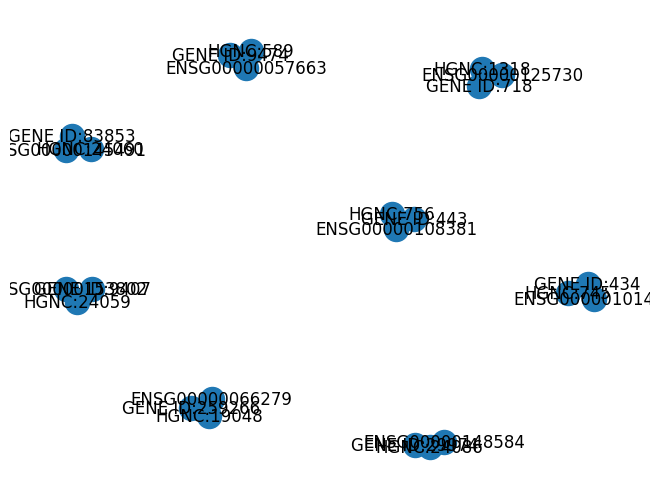

In [45]:
sub_concordance_G = nx.from_pandas_edgelist(sub_identifier_concordance_df, "primary_ID", "xref", create_using=nx.DiGraph)
nx.draw_spring(sub_concordance_G, with_labels=True)
plt.show()

In [46]:
list_of_scc_sub = list(nx.strongly_connected_components(sub_concordance_G))
len(list_of_scc_sub)

8

In [47]:
list_of_wcc_sub = list(nx.weakly_connected_components(sub_concordance_G))
len(list_of_wcc_sub)

8

In [48]:
list_of_isolates_sub = list(nx.isolates(sub_concordance_G))
len(list_of_isolates_sub)

0

In [49]:
sub_concordance_G.number_of_nodes()

24

In [50]:
def grouped_maximal_strong_clique_count(G_dir):
    # Step 1: Build mutual undirected graph
    G_mutual = nx.Graph()
    for u, v in G_dir.edges():
        if G_dir.has_edge(v, u):
            G_mutual.add_edge(u, v)

    # Step 2: Count maximal cliques only
    count_size_2 = 0
    count_size_3_or_more = 0

    for clique in nx.find_cliques(G_mutual):  # only returns maximal cliques
        if len(clique) == 2:
            count_size_2 += 1
        elif len(clique) >= 3:
            count_size_3_or_more += 1

    return count_size_2 + count_size_3_or_more


In [51]:
def get_maximal_strong_cliques(G_dir):
    """
    Return a list of maximal strong cliques in a directed graph.
    Each clique is represented as a list of nodes.
    """
    # Step 1: Build the mutual graph
    G_mutual = nx.Graph()
    for u, v in G_dir.edges():
        if G_dir.has_edge(v, u):
            G_mutual.add_edge(u, v)

    # Step 2: Extract maximal cliques
    cliques = list(nx.find_cliques(G_mutual))  # Only maximal cliques
    return cliques


In [52]:
sub_list_cliques = get_maximal_strong_cliques(sub_concordance_G)
len(sub_list_cliques)

8

number of nodes in the cliques

In [53]:
sub_nodes_in_clique = set().union(*sub_list_cliques)
len(sub_nodes_in_clique)

24

create a graph with all of the data

In [54]:
# Step 1: Remove rows with NaN or None in 'primary_ID' or 'xref' for the graph creation
valid_df = identifier_concordance_df.dropna(subset=["primary_ID", "xref"])

In [55]:
valid_df

,primary_gene_symbol,primary_ID,xref
0,MT-TF,ENSG00000210049,HGNC:7481
1,MT-RNR1,ENSG00000211459,HGNC:7470
2,MT-TV,ENSG00000210077,HGNC:7500
3,MT-RNR2,ENSG00000210082,HGNC:7471
4,MT-TL1,ENSG00000209082,HGNC:7490
...,...,...,...
624318,SMN-AS1,GENE ID:130453475,ENSG00000285204
624322,LINC03111,GENE ID:130572099,ENSG00000267686
624330,RNU6-840P,GENE ID:131183827,ENSG00000253084
624342,NPIPA6,GENE ID:131675794,ENSG00000183889


In [56]:
valid_df.loc[valid_df["xref"].isna()]

,primary_gene_symbol,primary_ID,xref


In [57]:
# Step 2: Create the graph from the valid rows
concordance_G = nx.from_pandas_edgelist(valid_df, "primary_ID", "xref", create_using=nx.DiGraph)


In [58]:
# Step 3: Find all unique nodes in 'primary_ID' and 'xref' columns (including isolated nodes)
all_nodes = set(identifier_concordance_df["primary_ID"])

# Step 5: Add the isolated nodes (those without edges) to the graph
concordance_G.add_nodes_from(all_nodes)


In [59]:
len(all_nodes)

161800

In [60]:
list_cliques = get_maximal_strong_cliques(concordance_G)
len(list_cliques)

60485

In [61]:
nodes_in_cliques = set().union(*list_cliques)
len(nodes_in_cliques)

129043

In [62]:
prefix_counts = defaultdict(int)

for item in nodes_in_cliques:
    for prefix in prefixes:
        if item.startswith(prefix):
            prefix_counts[prefix] += 1
            break  # stop at first matching prefix, if needed

# Print results
for prefix in prefixes:
    print(f"{prefix}: {prefix_counts[prefix]}")


HGNC: 43798
ENSG: 41425
GENE: 43820


In [63]:
if 'ENSG00000189064' in nodes_in_cliques:
    print("Found it!")
else:
    print("Nope, not there.")

Found it!


In [64]:
list_of_scc = list(nx.strongly_connected_components(concordance_G))
len(list_of_scc)

78806

In [65]:
list_of_isolates = list(nx.isolates(concordance_G))
len(list_of_isolates)

25017

In [66]:
prefix_counts = defaultdict(int)

for item in list_of_isolates:
    for prefix in prefixes:
        if item.startswith(prefix):
            prefix_counts[prefix] += 1
            break  # stop at first matching prefix, if needed

# Print results
for prefix in prefixes:
    print(f"{prefix}: {prefix_counts[prefix]}")


HGNC: 1841
ENSG: 21501
GENE: 1675


In [67]:
list_of_wcc = list(nx.weakly_connected_components(concordance_G))
len(list_of_wcc)

70070

In [68]:
concordance_G.number_of_nodes()

164099

how many sccs that are not just a single node

In [69]:
scc_of_not_one = [s for s in list_of_scc if len(s) != 1]
len(scc_of_not_one)

43758

how many nodes are in a scc that are connected to other nodes

In [70]:
unique_values = set().union(*scc_of_not_one)
len(unique_values)

129051

how many sccs are just one node (either isolate or part of a wcc)

In [71]:
scc_of_one = [s for s in list_of_scc if len(s) == 1]
len(scc_of_one)

35048

how many wccs are just one node? (should be same as number of isolates)

In [72]:
wcc_of_one = [s for s in list_of_wcc if len(s) == 1]
len(wcc_of_one)

25017

this is the number of isolates

In [73]:
len(wcc_of_one) == len(list_of_isolates)

True

In [74]:
flat_scc_of_one = {item for subset in scc_of_one for item in subset}
flat_wcc_of_one = {item for subset in wcc_of_one for item in subset}

# Now, compute the symmetric difference
diff_bw_scc_of_one_and_wcc_of_one = list(flat_scc_of_one ^ flat_wcc_of_one)
len(diff_bw_scc_of_one_and_wcc_of_one)

10031

In [75]:
diff_bw_scc_of_one_and_wcc_of_one

['ENSG00000281565',
 'ENSG00000228907',
 'ENSG00000236895',
 'ENSG00000278565',
 'GENE ID:124901333',
 'ENSG00000288272',
 'ENSG00000275399',
 'ENSG00000229381',
 'GENE ID:124907133',
 'ENSG00000283599',
 'GENE ID:124906938',
 'ENSG00000227600',
 'ENSG00000254237',
 'GENE ID:128966567',
 'ENSG00000232523',
 'GENE ID:124900833',
 'ENSG00000288331',
 'ENSG00000234280',
 'GENE ID:124900528',
 'ENSG00000281237',
 'ENSG00000288166',
 'GENE ID:101928782',
 'ENSG00000263037',
 'ENSG00000187951',
 'ENSG00000228463',
 'ENSG00000272217',
 'ENSG00000277614',
 'ENSG00000226365',
 'ENSG00000284255',
 'GENE ID:100216518',
 'GENE ID:105373757',
 'ENSG00000284504',
 'HGNC:41320',
 'GENE ID:283045',
 'ENSG00000282285',
 'ENSG00000261848',
 'ENSG00000291557',
 'GENE ID:105370315',
 'ENSG00000256884',
 'GENE ID:124902026',
 'ENSG00000277421',
 'ENSG00000266100',
 'ENSG00000282075',
 'GENE ID:130134321',
 'GENE ID:124905774',
 'ENSG00000287996',
 'GENE ID:124900277',
 'GENE ID:124905795',
 'ENSG0000024929

In [76]:
color_map = {
    "ENSG": "skyblue",
    "GENE ID": "lightgreen",
    "HGNC": "salmon",
    "OTHER": "gray"
}

In [77]:
from pyvis.network import Network
import networkx as nx
import pandas as pd

def get_prefix(node):
    if node.startswith("GENE ID"):
        return "GENE ID"
    elif node.startswith("ENSG"):
        return "ENSG"
    elif node.startswith("HGNC"):
        return "HGNC"
    else:
        return "OTHER"

def visualize_wcc_by_size(G, df, target_size):
    """
    Visualize the first Weakly Connected Component (WCC) of size `target_size` from graph `G`,
    using interactive Pyvis with color coding and gene symbol tooltips from `df`.

    Parameters:
    - G: A NetworkX DiGraph or Graph
    - df: DataFrame with 'primary_ID', 'xref', 'primary_gene_symbol'
    - target_size: Integer size of the WCC to visualize
    """
    # Build a lookup from both primary_ID and xref to gene symbol
    id_to_symbol = (
        pd.concat([
            df[['primary_ID', 'primary_gene_symbol']].copy().reset_index(drop=True),
            df[['xref', 'primary_gene_symbol']].copy().rename(columns={'xref': 'primary_ID'}).reset_index(drop=True)
        ])
        .dropna(subset=['primary_gene_symbol'])  # optional: drop rows with missing symbols
        .drop_duplicates(subset='primary_ID', keep='first')  # make index unique
        .set_index('primary_ID')['primary_gene_symbol']
        .to_dict()
    )

    # Get all weakly connected components
    wccs = list(nx.weakly_connected_components(G))

    # Filter for WCCs that match the target size
    target_wccs = [wcc for wcc in wccs if len(wcc) == target_size]

    if not target_wccs:
        print(f"No WCCs of size {target_size} found.")
        return

    # Take the first matching WCC
    target_wcc_nodes = target_wccs[0]
    target_wcc_subgraph = G.subgraph(target_wcc_nodes).copy()

    # Create Pyvis Network with directed arrows
    net = Network(height='800px', width='100%', notebook=True, cdn_resources='in_line', directed=True)

    # Add nodes with color and gene symbol info
    for node in target_wcc_subgraph.nodes():
        prefix = get_prefix(node)
        color = color_map.get(prefix, "gray")

        gene_symbol = id_to_symbol.get(node, "N/A")

        # Label = ID (or gene symbol, or both)
        net.add_node(
            node,
            label=f"{gene_symbol} ({node})",  # Shows both on the node
            title=f"{gene_symbol}",           # Optional: tooltip can still just show symbol
            color=color
        )

        # --- Add legend nodes (fake nodes that represent each type) ---
    legend_items = {
        "ENSG": "skyblue",
        "GENE ID": "lightgreen",
        "HGNC": "salmon",
        "Other": "gray"
    }

    legend_y = -300  # Starting Y position for legend nodes
    legend_x = -800  # X offset to keep legend on side

    for i, (label, color) in enumerate(legend_items.items()):
        net.add_node(
            f"legend_{label}",
            label=label,
            shape="box",
            color=color,
            physics=False,  # Prevent them from moving
            x=legend_x,
            y=legend_y + i * 70,
            fixed=True
        )

    # Add edges
    for u, v in target_wcc_subgraph.edges():
        net.add_edge(u, v)

    # Show interactive graph in browser or notebook
    file_name = f"../output/interactive_wcc_size_{target_size}.html"
    net.show(file_name)
    print(f"Visualization saved to {file_name}")


In [78]:
visualize_wcc_by_size(concordance_G,identifier_concordance_df, 32)

../output/interactive_wcc_size_32.html
Visualization saved to ../output/interactive_wcc_size_32.html


In [79]:
def visualize_wcc_containing_node(G, df, target_node):
    """
    Visualize the WCC containing a specific node ID using Pyvis.
    
    Parameters:
    - G: NetworkX graph
    - df: DataFrame with 'primary_ID', 'xref', 'primary_gene_symbol'
    - target_node: The node ID to search for (e.g., 'ENSG:...')
    """
    if target_node not in G:
        print(f"Node '{target_node}' not found in graph.")
        return

    # Find the WCC containing the target node
    for wcc in nx.weakly_connected_components(G):
        if target_node in wcc:
            target_wcc_nodes = wcc
            break
    else:
        print(f"No WCC found containing node '{target_node}'.")
        return

    # Build a lookup from both primary_ID and xref to gene symbol
    id_to_symbol = (
        pd.concat([
            df[['primary_ID', 'primary_gene_symbol']].copy().reset_index(drop=True),
            df[['xref', 'primary_gene_symbol']].copy().rename(columns={'xref': 'primary_ID'}).reset_index(drop=True)
        ])
        .dropna(subset=['primary_gene_symbol'])
        .drop_duplicates(subset='primary_ID', keep='first')
        .set_index('primary_ID')['primary_gene_symbol']
        .to_dict()
    )

    # Create subgraph
    subgraph = G.subgraph(target_wcc_nodes).copy()

    # Create Pyvis Network
    net = Network(height='800px', width='100%', notebook=True, cdn_resources='in_line', directed=True)

    for node in subgraph.nodes():
        prefix = get_prefix(node)
        color = color_map.get(prefix, "gray")

        gene_symbol = id_to_symbol.get(node, "N/A")

        net.add_node(
            node,
            label=f"{gene_symbol} ({node})",
            title=gene_symbol,
            color=color
        )
    # --- Add legend nodes (fake nodes that represent each type) ---
    legend_items = {
        "ENSG": "skyblue",
        "GENE ID": "lightgreen",
        "HGNC": "salmon",
        "Other": "gray"
    }

    legend_y = -300  # Starting Y position for legend nodes
    legend_x = -800  # X offset to keep legend on side

    for i, (label, color) in enumerate(legend_items.items()):
        net.add_node(
            f"legend_{label}",
            label=label,
            shape="box",
            color=color,
            physics=False,  # Prevent them from moving
            x=legend_x,
            y=legend_y + i * 70,
            fixed=True
        )

    for u, v in subgraph.edges():
        net.add_edge(u, v)

    file_name = f"../output/wcc_containing_{target_node.replace(':', '_')}.html"
    net.show(file_name)
    print(f"Visualization saved to {file_name}")


In [80]:
visualize_wcc_containing_node(concordance_G,identifier_concordance_df, "ENSG00000172456")

../output/wcc_containing_ENSG00000172456.html
Visualization saved to ../output/wcc_containing_ENSG00000172456.html


In [81]:
def visualize_wcc_by_gene_symbol(G, df, target_symbol):
    """
    Find and visualize the WCC containing a node that maps to the given gene symbol.

    Parameters:
    - G: NetworkX graph
    - df: DataFrame with 'primary_ID', 'xref', 'primary_gene_symbol'
    - target_symbol: gene symbol string to search for (e.g., 'BRCA2')
    """
    # Step 1: Find all IDs associated with this gene symbol
    matched_ids = set(
        df[df['primary_gene_symbol'] == target_symbol]['primary_ID'].tolist()
        + df[df['primary_gene_symbol'] == target_symbol]['xref'].tolist()
    )

    matched_ids = {i for i in matched_ids if i in G}  # Only keep IDs that exist in the graph

    if not matched_ids:
        print(f"No IDs found in graph for gene symbol '{target_symbol}'")
        return

    # Step 2: Find the WCC that contains one of those IDs
    for wcc in nx.weakly_connected_components(G):
        if matched_ids.intersection(wcc):
            target_wcc_nodes = wcc
            break
    else:
        print(f"No WCC found containing IDs for symbol '{target_symbol}'")
        return

    # Step 3: Build ID → gene symbol map
    id_to_symbol = (
        pd.concat([
            df[['primary_ID', 'primary_gene_symbol']].copy(),
            df[['xref', 'primary_gene_symbol']].copy().rename(columns={'xref': 'primary_ID'})
        ])
        .dropna(subset=['primary_gene_symbol'])
        .drop_duplicates(subset='primary_ID', keep='first')
        .set_index('primary_ID')['primary_gene_symbol']
        .to_dict()
    )

    # Step 4: Visualize with Pyvis
    from pyvis.network import Network

    net = Network(height='800px', width='100%', notebook=True, cdn_resources='in_line', directed=True)

    def get_prefix(node):
        return node.split(':')[0] if ':' in node else node.split()[0]

    for node in target_wcc_nodes:
        prefix = get_prefix(node)
        color = {
            'ENSG': 'skyblue',
            'GENE': 'lightgreen',
            'HGNC': 'salmon'
        }.get(prefix, 'gray')

        label = id_to_symbol.get(node, 'N/A')
        highlight = "gold" if node in matched_ids else color

        net.add_node(
            node,
            label=f"{label} ({node})",
            title=label,
            color=highlight
        )
        # --- Add legend nodes (fake nodes that represent each type) ---
    legend_items = {
        "ENSG": "skyblue",
        "GENE ID": "lightgreen",
        "HGNC": "salmon",
        "Other": "gray",
        "Matched Node": "gold"
    }

    legend_y = -300  # Starting Y position for legend nodes
    legend_x = -800  # X offset to keep legend on side

    for i, (label, color) in enumerate(legend_items.items()):
        net.add_node(
            f"legend_{label}",
            label=label,
            shape="box",
            color=color,
            physics=False,  # Prevent them from moving
            x=legend_x,
            y=legend_y + i * 70,
            fixed=True
        )


    for u, v in G.subgraph(target_wcc_nodes).edges():
        net.add_edge(u, v)

    file_name = f"../output/wcc_for_{target_symbol}.html"
    net.show(file_name)
    print(f"Visualization saved to {file_name}")


In [82]:
visualize_wcc_by_gene_symbol(concordance_G,identifier_concordance_df, "")

No IDs found in graph for gene symbol ''


In [83]:
visualize_wcc_by_gene_symbol(concordance_G,identifier_concordance_df, "C3")

../output/wcc_for_C3.html
Visualization saved to ../output/wcc_for_C3.html


In [84]:
largest_wcc_nodes = max(nx.weakly_connected_components(concordance_G), key=len)
largest_wcc_nodes

{'ENSG00000273730',
 'ENSG00000274917',
 'ENSG00000275215',
 'ENSG00000275757',
 'ENSG00000276700',
 'ENSG00000277739',
 'ENSG00000278189',
 'ENSG00000278233',
 'ENSG00000288326',
 'ENSG00000288387',
 'GENE ID:100008587',
 'GENE ID:106632260',
 'GENE ID:109864274',
 'GENE ID:109864281',
 'GENE ID:109910381',
 'GENE ID:109910384',
 'GENE ID:124907114',
 'GENE ID:124907115',
 'GENE ID:124907116',
 'GENE ID:124907117',
 'GENE ID:124907118',
 'GENE ID:124907119',
 'GENE ID:124907120',
 'GENE ID:124907121',
 'GENE ID:124907122',
 'GENE ID:124907123',
 'GENE ID:124907124',
 'GENE ID:124907125',
 'GENE ID:124907126',
 'GENE ID:124907127',
 'GENE ID:124907128',
 'GENE ID:124907129',
 'GENE ID:124907130',
 'GENE ID:124907131',
 'GENE ID:124907132',
 'GENE ID:124907133',
 'GENE ID:124907134',
 'GENE ID:124907135',
 'GENE ID:124907136',
 'GENE ID:124907137',
 'GENE ID:124907138',
 'GENE ID:124907139',
 'GENE ID:124907140',
 'GENE ID:124907141',
 'GENE ID:124907142',
 'GENE ID:124907143',
 'GENE I

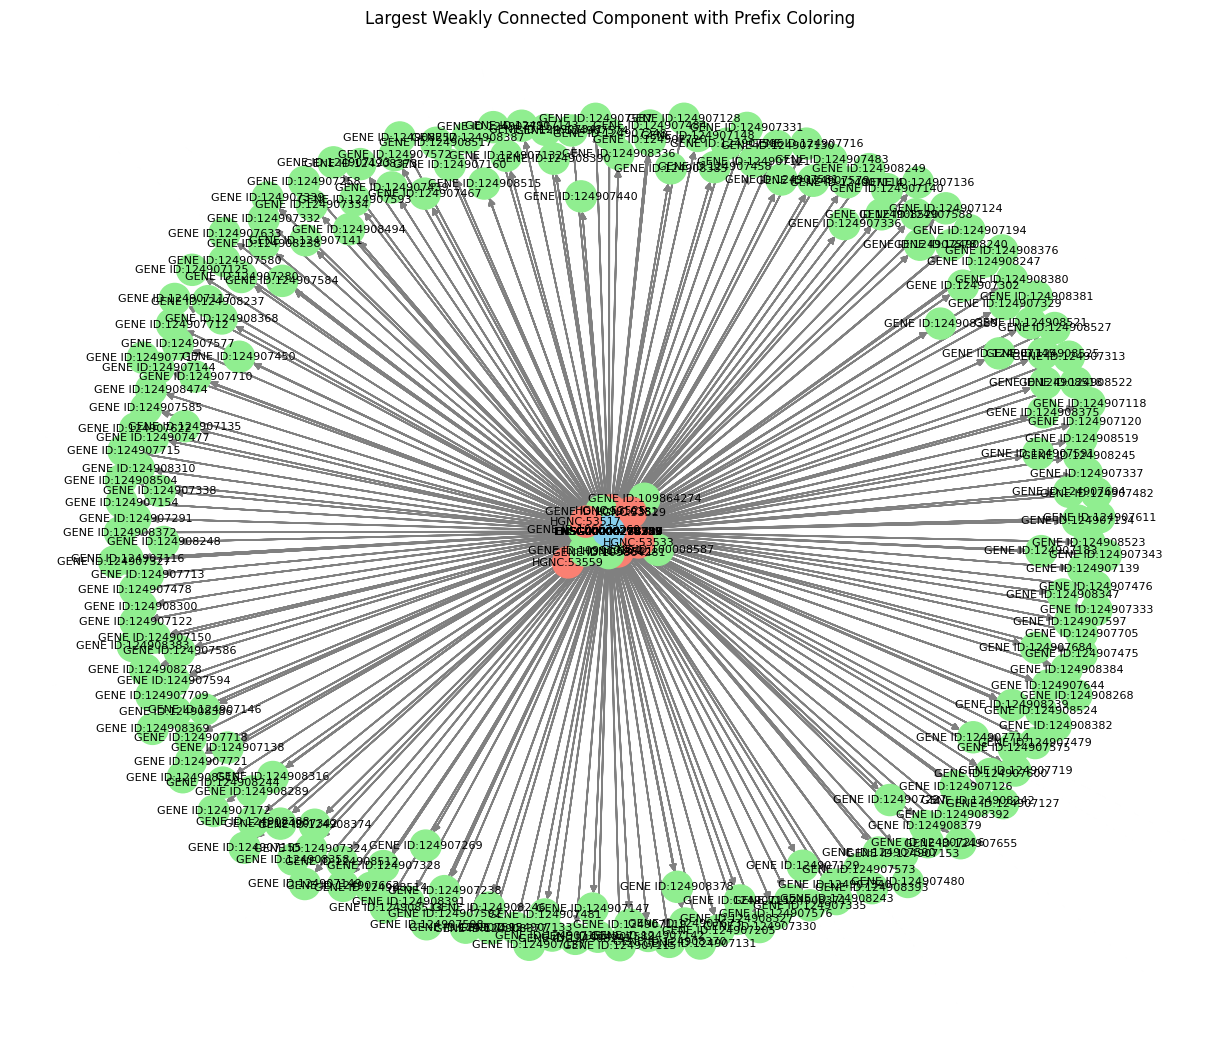

In [85]:
def visualize_largest_wcc(G):
    """
    Visualize the largest Weakly Connected Component (WCC) of the graph `G`.
    Nodes are colored based on their prefix (e.g., 'ENSG', 'GENE ID', 'HGNC').
    """
    # Step 1: Get the largest WCC
    largest_wcc_nodes = max(nx.weakly_connected_components(G), key=len)

    # Step 2: Create a subgraph from the largest WCC
    largest_wcc_subgraph = G.subgraph(largest_wcc_nodes).copy()

    # Step 3: Assign colors based on the node prefixes
    color_map = []
    for node in largest_wcc_subgraph.nodes():
        prefix = get_prefix(node)
        if prefix == 'ENSG':
            color_map.append('skyblue')
        elif prefix == 'GENE ID':
            color_map.append('lightgreen')
            
        elif prefix == 'HGNC':
            color_map.append('salmon')
        else:
            color_map.append('gray')

    # Step 4: Visualize the subgraph
    plt.figure(figsize=(12, 10))  # adjust size as needed
    pos = nx.spring_layout(largest_wcc_subgraph, seed=42)  # layout for the nodes

    # Draw the graph
    nx.draw(
        largest_wcc_subgraph,
        pos,
        with_labels=True,
        node_color=color_map,
        edge_color='gray',
        node_size=500,
        font_size=8
    )
    plt.title("Largest Weakly Connected Component with Prefix Coloring")
    plt.show()

# Call the function with your graph `G`
visualize_largest_wcc(concordance_G)


In [86]:
def visualize_largest_wcc_interactive(G):
    """
    Visualize the largest Weakly Connected Component (WCC) of the graph `G` interactively using Pyvis.
    Nodes are colored based on their prefix (e.g., 'ENSG', 'GENE ID', 'HGNC').
    """
    # Step 1: Get the largest WCC
    largest_wcc_nodes = max(nx.weakly_connected_components(G), key=len)

    # Step 2: Create a subgraph from the largest WCC
    largest_wcc_subgraph = G.subgraph(largest_wcc_nodes).copy()

    # Step 3: Create a Pyvis network object with 'in_line' CDN resources
    net = Network(height='800px', width='100%', notebook=True, cdn_resources='in_line', directed=True)

    # Step 4: Add nodes and edges to Pyvis network
    for node in largest_wcc_subgraph.nodes():
        prefix = get_prefix(node)
        # Color nodes based on prefix
        if prefix == 'ENSG':
            color = 'skyblue'
        elif prefix == 'GENE ID':
            color = 'lightgreen'
        elif prefix == 'HGNC':
            color = 'salmon'
        else:
            color = 'gray'

        # Add nodes with color
        net.add_node(node, label=node, color=color)

    for u, v in largest_wcc_subgraph.edges():
        # Add edges to the network
        net.add_edge(u, v)

    # Step 5: Show the network interactively
    net.show("../output/interactive_wcc_graph.html")

# Call the function with your graph `G`
visualize_largest_wcc_interactive(concordance_G)


../output/interactive_wcc_graph.html


Illustration of how you can hve more SCCs than WCCs

In [87]:
Gsimple = nx.DiGraph()

In [88]:
Gsimple.add_edges_from([(1, 2), (2, 3), (3, 1), (4, 5), (5, 6), (6,4), (6,1)])

In [89]:
Gsimplelist_of_scc = list(nx.strongly_connected_components(Gsimple))
len(Gsimplelist_of_scc)

2

In [90]:
Gsimplelist_of_wcc = list(nx.weakly_connected_components(Gsimple))
len(Gsimplelist_of_wcc)

1